In [19]:
def calcular_parametros(tempo_amostragem, caminho_txt):
    numerico = tempo_amostragem.isnumeric()
    if numerico:
        if ',' in tempo_amostragem:
            tempo_amostragem = tempo_amostragem.replace(',', '.')
            tempo_amostragem = float(tempo_amostragem)

    with open(rf"{caminho_txt}", "r") as arquivo:
        saida = [float(linha.strip()) for linha in arquivo.readlines()]

    entrada = [round(tempo_amostragem * i, 4) for i in range(1, len(saida)+1)]

    # Criando relação entre as duas listas
    comparacao = list(zip(entrada, saida))
    print("\n", comparacao, "\n")
    
    # Verificando se o sistema é subamortecido ou sobreamortecido
    # supondo um degrau/setpoint de 1000
    #degrau = 1000
    pico = max(saida)
    if pico > degrau:
        print('Sistema subamortecido')
        tempo_pico = comparacao[saida.index(pico)][0]
        erro_est = abs((saida[-1::][0])-degrau)/degrau
        overshoot = (pico/degrau) - 1
        print('Valor Máximo:',pico)
        print('Tempo de pico:', tempo_pico)
        print('Erro estacionario: {:.2f}%'.format(round(erro_est, 4)*100))
        print('Overshoot: {:.2f}%'.format(round(overshoot, 4)*100))

        # Calculo do Ts
        percent = degrau * 0.02
        margem_sup = degrau + percent
        margem_inf = degrau - percent
        print(margem_sup, margem_inf, '\n\n')

        for i in range(len(saida) - 14):
            if all(valor>=margem_inf and valor<=margem_sup for valor in saida[i:i+15]):
                print(saida[i:i+15])
                assentamento = saida[i:i+15]
                break
        # Tempo de assentamento
        ts = entrada[saida.index(assentamento[0])]
        print(f'Tempo de Assentamento: {ts}s')

    
    
    else:
        print('Sistema sobreamortecido')
        overshoot = 0
        tempo_pico = 0
        erro_est = abs((saida[-1::][0])-degrau)/degrau
        print('Erro estacionario: {:.2f}%'.format(round(erro_est, 4)*100))

    

In [20]:
a = '1,23'
a = a.replace(',', '.')
print(float(a))

1.23


In [21]:
import matplotlib.pyplot as plt

# Tempo de amostragem em milisegundos
tempo_amostragem = 0.05

saida = [63.31848, 19.25562, 54.39709, 17.2428, -69.63159, -13.7644, 166.458, 363.7072, 359.8993 ,379.0476 , 475.7137,
           625.8538, 657.8945, 549.2606, 819.9478, 900.4576, 914.982, 885.5524, 960.8944, 1053.481, 1050.924, 1060.607, 1110.599,
           1100.155,1109.239,1099.121,1156.62,1190.891,1196.658,1146.992,1148.733,1123.546,1106.084,1138.941,1184.092,1119.956,
           1057.669,1068.875,1077.307,1097.598,1040.588,996.6342,1007.514,1008.276,1016.49,975.7996,936.687,952.1362,945.01,953.3873,
           949.4707,906.387,940.3861,978.5195,950.4498,967.8574,935.7622,973.95,1018.611,989.78,984.3945,969.0542,1008.493,1042.166,
           1013.28,986.0809,1005.773,1020.461,1053.535,1027.478,986.1897,1012.464,1007.84,1029.273,1001.367,968.7821,978.5195,1008.221,
           996.8518,986.6793,940.8213,970.9581,994.8391,966.3342,988.0936,954.4753,977.8124,1015.674,988.692,982.9258,972.4813,1004.522,
           1040.371,1017.85,992.9895,1003.271,1014.749,1045.756,1024.813,989.8344]

print(saida, '\n\n')
entrada = [round(tempo_amostragem * i, 4) for i in range(1, len(saida)+1)]
print(entrada)

[63.31848, 19.25562, 54.39709, 17.2428, -69.63159, -13.7644, 166.458, 363.7072, 359.8993, 379.0476, 475.7137, 625.8538, 657.8945, 549.2606, 819.9478, 900.4576, 914.982, 885.5524, 960.8944, 1053.481, 1050.924, 1060.607, 1110.599, 1100.155, 1109.239, 1099.121, 1156.62, 1190.891, 1196.658, 1146.992, 1148.733, 1123.546, 1106.084, 1138.941, 1184.092, 1119.956, 1057.669, 1068.875, 1077.307, 1097.598, 1040.588, 996.6342, 1007.514, 1008.276, 1016.49, 975.7996, 936.687, 952.1362, 945.01, 953.3873, 949.4707, 906.387, 940.3861, 978.5195, 950.4498, 967.8574, 935.7622, 973.95, 1018.611, 989.78, 984.3945, 969.0542, 1008.493, 1042.166, 1013.28, 986.0809, 1005.773, 1020.461, 1053.535, 1027.478, 986.1897, 1012.464, 1007.84, 1029.273, 1001.367, 968.7821, 978.5195, 1008.221, 996.8518, 986.6793, 940.8213, 970.9581, 994.8391, 966.3342, 988.0936, 954.4753, 977.8124, 1015.674, 988.692, 982.9258, 972.4813, 1004.522, 1040.371, 1017.85, 992.9895, 1003.271, 1014.749, 1045.756, 1024.813, 989.8344] 


[0.05, 0.1, 

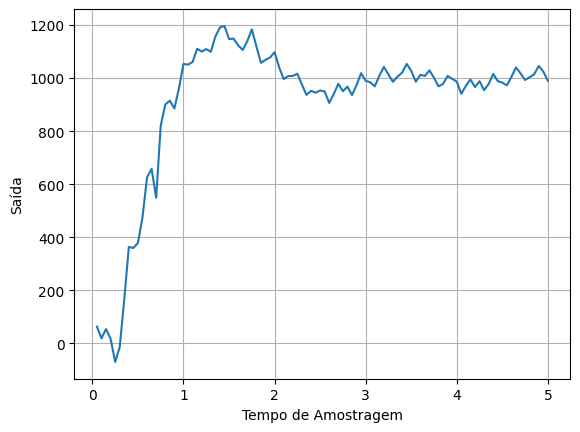

In [22]:
plt.plot(entrada, saida)
plt.xlabel('Tempo de Amostragem')
plt.ylabel('Saída')
plt.grid()

In [23]:
# Criando relação entre as duas listas
comparacao = list(zip(entrada, saida))
print("\n", comparacao, "\n")

# Verificando se o sistema é subamortecido ou sobreamortecido
# supondo um degrau/setpoint de 1000
degrau = 1000
pico = max(saida)
if pico > degrau:
    print('Sistema subamortecido')
    tempo_pico = comparacao[saida.index(pico)][0]
    erro_est = abs((saida[-1::][0])-degrau)/degrau
    overshoot = (pico/degrau) - 1
    print('Valor Máximo:',pico)
    print('Tempo de pico:', tempo_pico)
    print('Erro estacionario: {:.2f}%'.format(round(erro_est, 4)*100))
    print('Overshoot: {:.2f}%'.format(round(overshoot, 4)*100))

else:
    print('Sistema sobreamortecido')
    overshoot = 0
    tempo_pico = 0
    erro_est = abs((saida[-1::][0])-degrau)/degrau
    print('Erro estacionario: {:.2f}%'.format(round(erro_est, 4)*100))


 [(0.05, 63.31848), (0.1, 19.25562), (0.15, 54.39709), (0.2, 17.2428), (0.25, -69.63159), (0.3, -13.7644), (0.35, 166.458), (0.4, 363.7072), (0.45, 359.8993), (0.5, 379.0476), (0.55, 475.7137), (0.6, 625.8538), (0.65, 657.8945), (0.7, 549.2606), (0.75, 819.9478), (0.8, 900.4576), (0.85, 914.982), (0.9, 885.5524), (0.95, 960.8944), (1.0, 1053.481), (1.05, 1050.924), (1.1, 1060.607), (1.15, 1110.599), (1.2, 1100.155), (1.25, 1109.239), (1.3, 1099.121), (1.35, 1156.62), (1.4, 1190.891), (1.45, 1196.658), (1.5, 1146.992), (1.55, 1148.733), (1.6, 1123.546), (1.65, 1106.084), (1.7, 1138.941), (1.75, 1184.092), (1.8, 1119.956), (1.85, 1057.669), (1.9, 1068.875), (1.95, 1077.307), (2.0, 1097.598), (2.05, 1040.588), (2.1, 996.6342), (2.15, 1007.514), (2.2, 1008.276), (2.25, 1016.49), (2.3, 975.7996), (2.35, 936.687), (2.4, 952.1362), (2.45, 945.01), (2.5, 953.3873), (2.55, 949.4707), (2.6, 906.387), (2.65, 940.3861), (2.7, 978.5195), (2.75, 950.4498), (2.8, 967.8574), (2.85, 935.7622), (2.9, 9

In [24]:
# Pegar o valor do degrau/setpoint
# 2% de 1000 -> 20
# 1000 - 20 = 980  |  1000 + 20 = 1020
percent = degrau * 0.02
margem_sup = degrau + percent
margem_inf = degrau - percent
print(margem_sup, margem_inf, '\n\n')

for i in range(len(saida) - 14):
    if all(valor>=margem_inf and valor<=margem_sup for valor in saida[i:i+15]):
        print(saida[i:i+15])

1020.0 980.0 




In [25]:
for i in range(len(saida) - 7):
    print(saida[i:i+8])

[63.31848, 19.25562, 54.39709, 17.2428, -69.63159, -13.7644, 166.458, 363.7072]
[19.25562, 54.39709, 17.2428, -69.63159, -13.7644, 166.458, 363.7072, 359.8993]
[54.39709, 17.2428, -69.63159, -13.7644, 166.458, 363.7072, 359.8993, 379.0476]
[17.2428, -69.63159, -13.7644, 166.458, 363.7072, 359.8993, 379.0476, 475.7137]
[-69.63159, -13.7644, 166.458, 363.7072, 359.8993, 379.0476, 475.7137, 625.8538]
[-13.7644, 166.458, 363.7072, 359.8993, 379.0476, 475.7137, 625.8538, 657.8945]
[166.458, 363.7072, 359.8993, 379.0476, 475.7137, 625.8538, 657.8945, 549.2606]
[363.7072, 359.8993, 379.0476, 475.7137, 625.8538, 657.8945, 549.2606, 819.9478]
[359.8993, 379.0476, 475.7137, 625.8538, 657.8945, 549.2606, 819.9478, 900.4576]
[379.0476, 475.7137, 625.8538, 657.8945, 549.2606, 819.9478, 900.4576, 914.982]
[475.7137, 625.8538, 657.8945, 549.2606, 819.9478, 900.4576, 914.982, 885.5524]
[625.8538, 657.8945, 549.2606, 819.9478, 900.4576, 914.982, 885.5524, 960.8944]
[657.8945, 549.2606, 819.9478, 900.45

In [26]:
for i in range(len(saida) - 14):
    if all(valor>=margem_inf and valor<=margem_sup for valor in saida[i:i+15]):
        print(saida[i:i+15])

In [27]:
print(entrada[saida.index(996.6342)])
print(entrada[saida.index(1007.514)])
print(entrada[saida.index(1008.276)])
print(entrada[saida.index(1016.49)])
print(entrada[saida.index(1017.85)])

2.1
2.15
2.2
2.25
4.7


In [28]:
for i in range(len(saida) - 18):
    if all(valor>=950 and valor<=1050 for valor in saida[i:i+19]):
        print(saida[i:i+19])

[970.9581, 994.8391, 966.3342, 988.0936, 954.4753, 977.8124, 1015.674, 988.692, 982.9258, 972.4813, 1004.522, 1040.371, 1017.85, 992.9895, 1003.271, 1014.749, 1045.756, 1024.813, 989.8344]


In [29]:
print(entrada[saida.index(970.9581)])

4.1


In [34]:
#with open(r"C:\Users\silas\OneDrive\Documentos\Programas Python\Controle\dados.txt", "r") as arquivo:
#    linhas = [float(linha.strip()) for linha in arquivo.readlines()]
#print(linhas)
linhas = [63.31848, 19.25562, 54.39709, 17.2428, -69.63159, -13.7644, 166.458, 363.7072, 359.8993 ,379.0476 , 475.7137,
           625.8538, 657.8945, 549.2606, 819.9478, 900.4576, 914.982, 885.5524, 960.8944, 1053.481, 1050.924, 1060.607, 1110.599,
           1100.155,1109.239,1099.121,1156.62,1190.891,1196.658,1146.992,1148.733,1123.546,1106.084,1138.941,1184.092,1119.956,
           1057.669,1068.875,1077.307,1097.598,1040.588,996.6342,1007.514,1008.276,1016.49,975.7996,936.687,952.1362,945.01,953.3873,
           949.4707,906.387,940.3861,978.5195,950.4498,967.8574,935.7622,973.95,1018.611,989.78,984.3945,969.0542,1008.493,1042.166,
           1013.28,986.0809,1005.773,1020.461,1053.535,1027.478,986.1897,1012.464,1007.84,1029.273,1001.367,968.7821,978.5195,1008.221,
           996.8518,986.6793,940.8213,970.9581,994.8391,966.3342,988.0936,954.4753,977.8124,1015.674,988.692,982.9258,972.4813,1004.522,
           1040.371,1017.85,992.9895,1003.271,1014.749,1045.756,1024.813,989.8344]

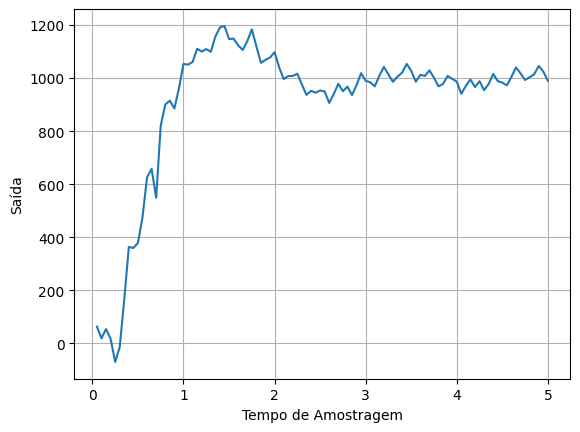

In [35]:
plt.plot(entrada, linhas)
plt.xlabel('Tempo de Amostragem')
plt.ylabel('Saída')
plt.grid()

In [36]:
print(max(saida[-20:]))

1045.756


## Resposta em frequencia

[]

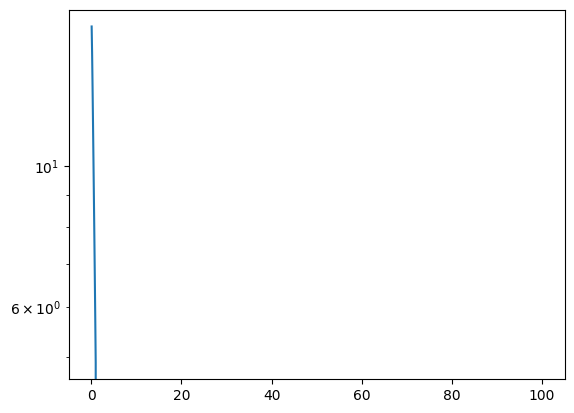

In [41]:
import pandas as pd

df = pd.read_excel(r'C:\Users\silas\OneDrive\Área de Trabalho\Lista2RF.xlsx')
w = df.iloc[:,0].to_list()
modulo_db = df.iloc[:,1].to_list()
fase = df.iloc[:,2].to_list()
#print(w)
#print(modulo_db)
#print(fase)

plt.yscale('log')
plt.gca().yaxis.set_tick_params(rotation=0)
plt.plot(w, modulo_db, fase)
#plt.xlabel('')
#plt.ylabel('Saída')
plt.plot()